# Avant de run le code, il est nécessaire d'installer deeplake avec "pip install deeplake" via le terminal de commande.
Cette librairie nous permet d'utiliser une base de données EMNIST, constituée de caractères de toute sorte.

In [98]:
import numpy
import tensorflow
import matplotlib.pyplot
import deeplake
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.models import Sequential
SGD = tensorflow.keras.optimizers.SGD

In [42]:
ds_train = deeplake.load("hub://activeloop/emnist-byclass-train")
ds_test = deeplake.load("hub://activeloop/emnist-byclass-test")

hub://activeloop/emnist-byclass-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-byclass-train
hub://activeloop/emnist-byclass-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/emnist-byclass-test


In [43]:
X_train=ds_train.images
Y_train=ds_train.labels
print(X_train.shape)
print("Les dimensions d'une image de la base de données sont : ", X_train[2].shape)
print("Le nombre d'images dans la base de données est : ", len(X_train))

(697932, 28, 28)
Les dimensions d'une image de la base de données sont :  (28, 28)
Le nombre d'images dans la base de données est :  697932


In [45]:
X_test=ds_test.images
Y_test=ds_test.labels

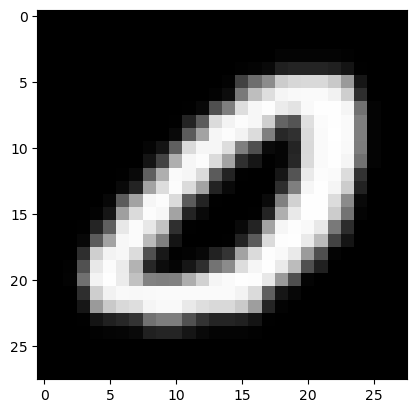

In [46]:
matplotlib.pyplot.imshow(X_test[2].numpy(), cmap=matplotlib.pyplot.cm.gray)

Voici la représentation numpy de la 5e image du dataset d'entrainement [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   32  82 127 127 127 127 170 138  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  46 125 141
  243 252 254 254 253 250 245 202  20   0]
 [  0   0   0   0   0   0   0   0   0   0   4  21  82 129 204 246 254 251
  222 215 140 127 114  39  32   4   

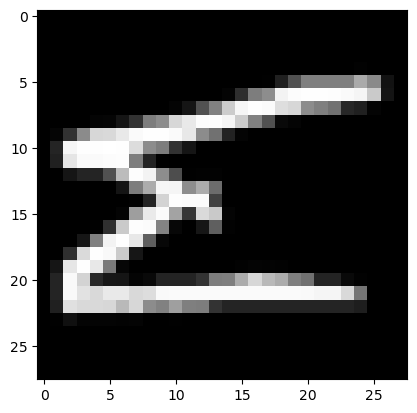

In [51]:
image_arr = X_train[4]
print("Voici la représentation numpy de la 5e image du dataset d'entrainement", image_arr.numpy())

matplotlib.pyplot.imshow(image_arr, cmap=matplotlib.pyplot.cm.gray)

Transforme les matrices 28x28 en vecteur de 784 lignes

In [93]:
#X_train=X_train.numpy()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
#X_test=X_test.numpy()
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [94]:
X_train.shape

(697932, 28, 28, 1)

Normalise les vecteurs

In [76]:
X_train =(X_train.astype('float32')-127.5)/127.5
X_test  = (X_test.astype('float32')-127.5)/127.5

In [95]:
dimension_entree = (28,28,1)
nbneurones1 = 250
nbneurones2 = 128
nbneurones3 = 10
epoch = 50
batchsize = 250
taux_apprentissage = 0.01

In [99]:
#Modèle de réseau de neurones avec 3 couches
model = Sequential()

model.add(Conv2D(32, (3,3),activation="sigmoid", strides=(2,2), padding = "same", input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation="sigmoid", strides=(2,2), padding = "same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(nbneurones1, input_shape=(dimension_entree,)))  
model.add(Activation('sigmoid'))
model.add(Dense(nbneurones2))
model.add(Activation('sigmoid'))
model.add(Dense(nbneurones3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               784250    
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [100]:
# Définition des hyperparamètres de l'entraînement
sgd = SGD(lr=taux_apprentissage)

model.compile(
    loss='categorical_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy']  
)

In [101]:
# Entraînement
hist_train = model.fit(
    X_train, 
    Y_train,
    batch_size=batchsize,
    epochs=epoch,
    validation_data=(X_test, Y_test),
    verbose=2
)

Epoch 1/50


ValueError: in user code:

    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\egoni\.conda\envs\projetassane\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


## La cellule suivante doit être run une seule et unique fois !!

In [ ]:
# Test
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=128)

In [ ]:
#On affiche les résultats

#Courbe de loss

#Courbe d'accuracy (métrique qui permet de valider le modèle)